## Trajectory Calculations - workflow

- first to calculate the trajectory, the reverse trajectory, and the clipped trajectories
- then to calculate the integration error and filter out the bad trajectories
- seperate the trajectories into folders which are rainy, dry and total, then seasonally?

##### Mapping
- map the different groups

In [2]:
# STEP 0: Must be done before anything each time notebook is loaded
# Import PySplit

import pysplit as py
import numpy as np
import pickle as pickle
from pprint import pprint
import os
from __future__ import print_function

#### Trajectory generation

- 2010 to 2017 
- Jan to Dec
- 4th hour
- altitude of 1500 - best for Christmas Island, ends at 850hpa which is rainfall level. The endpoint altitude

###### Below the years of 2015-2017 have been calculated as a start 
- nail out the clustering and then use the base code to create a climatology based on these years, and then look at the differences between the different seasons in Christmas Island 




In [87]:
# STEP 1: TRAJECTORY GENERATION (not yet tested on mac)
# check out bulk_trajen_example.py

#directory setup
working_dir = r'/Volumes/Seagate_Backup/hysplit4/working'
storage_dir = r'/Volumes/Seagate_Backup/hysplit4/pysplitgen/XI'
meteo_dir = r'/Volumes/Seagate_Backup/HYSPLIT/ncep_monYYYY'
# meteo_dir = r'C:\hysplit4\gdas'

#file basename
basename = 'XI'

if not os.path.exists(storage_dir):
    os.makedirs(storage_dir)
    
#Arguments
#years = [2007]
years=range(1980,2018)
#months = [1, 8]
months=range(1,13)
hours = [4]
altitudes = [1500]
location = (-10.45, 105.7)
runtime = -168

#Generate trajs
py.generate_bulktraj(basename, working_dir, storage_dir, meteo_dir,
                          years, months, hours, altitudes, location, runtime, meteoyr_2digits=False,
                          monthslice=slice(0, 32, 1), meteo_bookends=([0],[0]), get_reverse=True, get_clipped=True, hysplit="/Volumes/Seagate_Backup/hysplit4/exec/hyts_std")

In [101]:
trajgroup.make_infile(r'/Volumes/Seagate_Backup/hysplit4/cluster/working')

#### Grouping the trajectories

- determine the distance between the start and end of trajectories, the vector 
- first seperated by the names - the summer/winter etv values


In [100]:
# selecting only the XI_long_test data set
trajgroup = py.make_trajectorygroup(r'/Volumes/Seagate_Backup/hysplit4/pygen/XI/*XI*')

#for traj in trajgroup:
   # traj.calculate_distance()
    #traj.calculate_vector()
    #traj.calculate_rh()
    #traj.calculate_sh()
    
    

#### Calculating the integration error

- integration error calculated for the entire period.



- first the reversetraj has to be loaded, this is because the integration error is the physical and numerical error. This is calculated by the distance between the original trajectory and the reverse trajectory start and end points. 

- then the integration error can be calculated by traj.calculate_integrationerr()

    - this also should inclue te traj.integration_error (the relative error%) and traj.integration_error_abs (the absolute error in meters)
    
    
   

In [90]:
#Step 1: integration error filtering integr 
#first load reverse Traj
for traj in trajgroup:
    traj.load_reversetraj()
#then calculate integration error
# Values computed when calling ``Trajectory.calculate_integrationerr()``:
#     ``Trajectory.integration_error``, the relative error (%)
#     ``Trajectory.integration_error_abs``, the absolute error (meters)


/Users/jess/anaconda3/envs/pysplitenv/lib/python3.6/site-packages/pysplit/hypath.py:144: RuntimeWarning: invalid value encountered in arccos
  np.cos(lon[0] - lon)) * 6371) * 1000
/Users/jess/anaconda3/envs/pysplitenv/lib/python3.6/site-packages/pysplit/hypath.py:136: RuntimeWarning: invalid value encountered in arccos
  np.cos(lon[:-1] - lon[1:])) * 6371) * 1000


Trajectory /Volumes/Seagate_Backup/hysplit4/pysplitgen/XI_Workingfolder/XIjun1500winter20170618041.0 has a bad reverse trajectory: 
	
                          168 hours instead of 166 hours


In [27]:
#Step 2: calculate the integration error and determine if there is any problems in the integration calculation 
#any problems would be to do with the reverse trajectory and any issues with the generation of this. 

c=0
for traj in trajgroup:
    traj.calculate_integrationerr()
    print(c)
    c+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [28]:
#done to identify the the bad reverse trajectories
badreverse=[] #identigy whihc of the trajectories are bad and then put them into a badreverse list of the trajectory.trajid.
# this is done through .append below

for traj in trajgroup:
    try: 
        print(traj.integration_error)
    except:
        print(traj.trajid)
        badreverse.append(traj.trajid)
        
#.pop is used to exclude a number of trajectories from the list, based on a list created previously., i.e the badreverse
#list of trajectories can be used. 

trajgroup.pop(trajid=badreverse) 
print('Result: ', trajgroup.trajcount, 'trajectories')

0.029042516696327455
0.006086721111470881
0.01091866768642776
0.01368974812970841
0.008139903913002507
0.011145999785109372
0.002222459807852296
0.0008099319960731332
0.0015289892143446244
0.05144402870852862
0.003715470416689239
0.04227520318951587
0.0038366797636849538
0.005633405198279188
0.004820217562035233
0.010682258411518033
0.009695610602416308
0.009996744759016626
0.002926877702775081
0.01173722740380658
0.003716766476974922
0.0009976560145465352
0.0038886725565396435
0.001302032077228971
0.006942413063218314
0.0069943668154921704
0.0009585143768695938
0.1549288952778137
0.0027956263575724632
0.03704750281260649
0.00580226157158518
0.0017091725121802111
0.21745104628065817
5.336635120250855
0.3395608792543706
0.0016620648762894193
0.0021127560801425553
0.006220133373736596
0.015414050552701328
0.004630700132668675
0.004575093387686707
5.704394770309492
0.00161099003980298
0.0009943569055499276
0.004331226683838426
0.13783151104705843
0.001875868118520202
1.0431384724834731
0.

0.014230805231461223
0.035637423542472194
0.0053358837191307806
12.838556324759992
0.0013840759537261796
0.038359885636931074
0.004651934672142508
0.0013295080368207332
0.0019176210043494303
0.0028680221554872203
0.00503605760894925
0.032138702337716187
0.005938847972565779
0.0020233356134381824
0.0026195347208252343
0.001538269099059772
0.066552700465229
0.05263370767951512
0.0005986340977788352
0.004320685114378978
0.03418010824695743
0.00237003000015549
0.0015311404678533664
0.011754259711701149
0.02041705458262575
0.0014524826129937865
0.041038745243327776
0.0023312410086799504
0.005573930921553077
0.0022225593025145913
0.0008486459512747756
0.00476005975141431
0.0031291021007444817
0.008828758359722213
0.023240642018009895
0.011574644919353798
0.007151540755428052
0.024647390649874878
0.0
0.001117673239234748
0.0024565898419917184
0.004670205649647688
0.0022117594073286844
0.0018194459539216297
0.00301015406565924
0.01027085545104177
0.0034687761496577044
0.0011288527272524218
0.0

ValueError: TrajIDs not in list of self.trajids

In [29]:
#The cut-off is identified in order to identify trajectories which are outside of the acceptable range, 
#these can then be taken out of the relationships through the append functions below

relative_errors = [traj.integration_error for traj in trajgroup]
cutoff = np.mean(relative_errors) + (np.std(relative_errors) * 2)

print('Integration error upper limit: ', cutoff)

bad = []
for traj in trajgroup:
    if traj.integration_error > cutoff:
        bad.append(traj.trajid)

print('Expectation: ', trajgroup.trajcount, 'trajectories -', len(bad),
      'bad trajectories =', trajgroup.trajcount-len(bad), 'trajectories')


trajgroup.pop(trajid=bad)
print('Result: ', trajgroup.trajcount, 'trajectories')



Integration error upper limit:  4.863693999616333
Expectation:  1096 trajectories - 31 bad trajectories = 1065 trajectories
Result:  1065 trajectories


### Create the rainy, dry and total groups - also the Moisture uptakes

In [30]:
# moisture uptake identification of the moisture source regions for the rainy day trajectories
moisture = []
for traj in trajgroup:
    traj.moisture_uptake(precipitation=-0.2,evaporation=0.2,interval=3)
    moisture.append(traj)
    

In [63]:
#appending the rainy day trajectories
rainylist = []

for traj in trajgroup:
    traj.set_rainstatus()
    if traj.rainy:
        rainylist.append(traj)
        
rainy_trajgroup = py.TrajectoryGroup(rainylist)
dry_trajgroup = trajgroup - rainy_trajgroup
print('Total trajectories in total group: ',trajgroup.trajcount)
print('Total trajectories in dry group: ',dry_trajgroup.trajcount)
print('Total trajectories in rainy group: ',rainy_trajgroup.trajcount)
pprint(vars(rainy_trajgroup))
pprint(vars(dry_trajgroup))

Total trajectories in total group:  1065
Total trajectories in dry group:  653
Total trajectories in rainy group:  412
{'trajcount': 412,
 'trajectories': [<pysplit.traj.Trajectory object at 0x1234b6860>,
 'trajids': ['/Volumes/Seagate_Backup/hysplit4/pysplitgen/XI_Workingfolder/XIjan1500summer20150102041.0',
             '/Volumes/Seagate_Backup/hysplit4/pysplitgen/XI_Workingfolder/XIjan1500summer20150103041.0',
             '/Volumes/Seagate_Backup/hysplit4/pysplitgen/XI_Workingfolder/XIjan1500summer20150104041.0',
             '/Volumes/Seagate_Backup/hysplit4/pysplitgen/XI_Workingfolder/XIjan1500summer20150107041.0',
             '/Volumes/Seagate_Backup/hysplit4/pysplitgen/XI_Workingfolder/XIjan1500summer20150109041.0',
             '/Volumes/Seagate_Backup/hysplit4/pysplitgen/XI_Workingfolder/XIjan1500summer20150111041.0',
             '/Volumes/Seagate_Backup/hysplit4/pysplitgen/XI_Workingfolder/XIjan1500summer20150112041.0',
             '/Volumes/Seagate_Backup/hysplit4/pyspli

             '/Volumes/Seagate_Backup/hysplit4/pysplitgen/XI_Workingfolder/XIaug1500winter20150828041.0',
             '/Volumes/Seagate_Backup/hysplit4/pysplitgen/XI_Workingfolder/XIoct1500spring20161013041.0',
             '/Volumes/Seagate_Backup/hysplit4/pysplitgen/XI_Workingfolder/XIoct1500spring20161025041.0',
             '/Volumes/Seagate_Backup/hysplit4/pysplitgen/XI_Workingfolder/XIjan1500summer20170116041.0',
             '/Volumes/Seagate_Backup/hysplit4/pysplitgen/XI_Workingfolder/XIaug1500winter20150821041.0',
             '/Volumes/Seagate_Backup/hysplit4/pysplitgen/XI_Workingfolder/XIdec1500summer20151207041.0',
             '/Volumes/Seagate_Backup/hysplit4/pysplitgen/XI_Workingfolder/XIjan1500summer20170115041.0',
             '/Volumes/Seagate_Backup/hysplit4/pysplitgen/XI_Workingfolder/XIdec1500summer20161223041.0',
             '/Volumes/Seagate_Backup/hysplit4/pysplitgen/XI_Workingfolder/XImar1500autumn20160303041.0',
             '/Volumes/Seagate_Backup/hysplit4

In [43]:
pprint(vars(rainy_trajgroup[3]))

{'cfilename': 'XIjan1500summer2015010704CLIPPED',
 'cfolder': '/Volumes/Seagate_Backup/hysplit4/pysplitgen/XI_Workingfolder/clippedtraj',
 'cfullpath': '/Volumes/Seagate_Backup/hysplit4/pysplitgen/XI_Workingfolder/clippedtraj/XIjan1500summer2015010704CLIPPED',
 'circular_mean': -1.676294239368014,
 'data':           Timestep  Pressure  Rainfall  Mixing_Depth  Relative_Humidity  \
Timestep                                                                  
 0.0           0.0     848.3       0.3         832.8               65.1   
-1.0          -1.0     850.8       0.3         782.8               66.4   
-2.0          -2.0     853.4       0.3         732.0               67.8   
-3.0          -3.0     855.6       0.3         669.1               68.8   
-4.0          -4.0     857.5       0.3         608.1               69.6   
-5.0          -5.0     859.1       0.2         604.3               71.0   
-6.0          -6.0     861.0       0.2         604.2               72.1   
-7.0          -7.

## Mapping examples

- https://github.com/mscross/pysplit/blob/master/docs/examples/basic_plotting_example.py
- https://github.com/mscross/pysplit/blob/master/docs/examples/basic_scatterplotting.py


- testing a number of different plots and determine what is the best representation for this analysis 

In [35]:
import matplotlib.pyplot as plt

TypeError: __init__() got an unexpected keyword argument 'zmapbound'

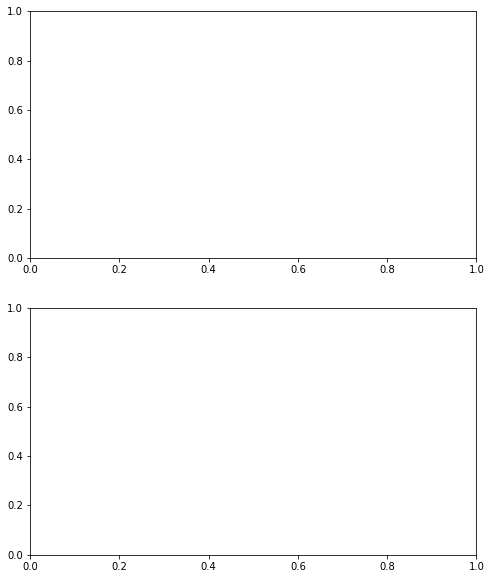

In [84]:
#FIRST ATTEMPT: taken from the basic plotting examples 

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 10))

mapcorners = [40, -60, 170, 30]

standard_pm = [100, -50, -20, 0]

# Note we draw every 15 degrees of longitude, but only label every 30
# Check the pysplit.MapDesign() docs for more options than param_dict shows
param_dict = {'projection':'cyl','zmapbound':10, 'latlon_labelspacing':(10,30),
              'latlon_spacing':(10,15), 'latlon_fs':16, 'drawstates':True,
              'resolution':'l', 'mapcolor':'light'}

map_params0 = py.MapDesign(mapcorners, standard_pm, **param_dict)
map_params1 = py.MapDesign(mapcorners, standard_pm, lon_labels=['bottom'], **param_dict)

scattermap0 = map_params0.make_basemap(ax=ax0)
scattermap1 = map_params1.make_basemap(ax=ax1)
min_pressure = 1600.0
max_pressure = 0.0

for traj in rainy_trajgroup:
    if traj.data.Pressure.max() > max_pressure:
        max_pressure = traj.data.Pressure.max()
    if traj.data.Pressure.min() < min_pressure:
        min_pressure = traj.data.Pressure.min()

# To cut down on crowding, let's plot every other trajectory
for traj in rainy_trajgroup[::2]:
    mappable = scattermap0.scatter(*traj.path.xy,
    								c=traj.data.Pressure.astype(np.float64).values,
    								cmap=plt.cm.magma, vmin=min_pressure,
    								vmax=max_pressure, zorder=15, latlon=True,
    								edgecolor='none')
    
    mappable = py.traj_scatter(traj.data.Pressure.astype(np.float64).values,
                                    traj.data.geometry.apply(lambda p: p.x).values,
                                    traj.data.geometry.apply(lambda p: p.y).values,
                                    scattermap1, colormap=plt.cm.magma,
                                    vmin=min_pressure, vmax=max_pressure,
                                    suppress_printmsg=True)

/Users/jess/anaconda3/envs/pysplitenv/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/jess/anaconda3/envs/pysplitenv/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


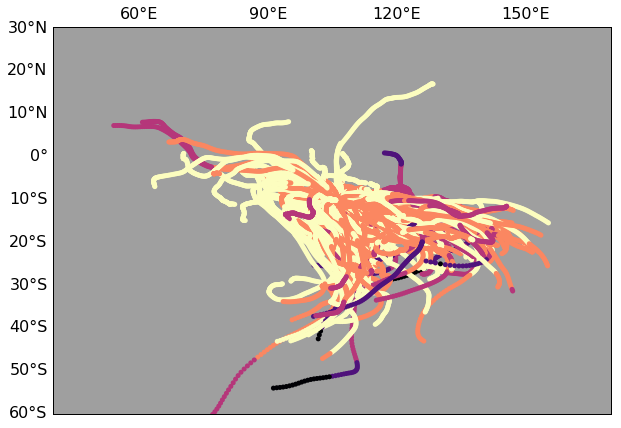

In [57]:
map_params2 = py.MapDesign(mapcorners, standard_pm, **param_dict)
boundarymap = map_params2.make_basemap()

for traj in rainy_trajgroup[::2]:    
    mappable = py.traj_scatter(traj.data.Pressure.astype(np.float64).values,
                                    *traj.path.xy, hymap=boundarymap,
                                    colormap=plt.cm.magma, vmin=min_pressure,
                                    vmax=max_pressure, suppress_printmsg=True,
                                    cnormalize='boundary', levels=6)

/Users/jess/anaconda3/envs/pysplitenv/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/jess/anaconda3/envs/pysplitenv/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


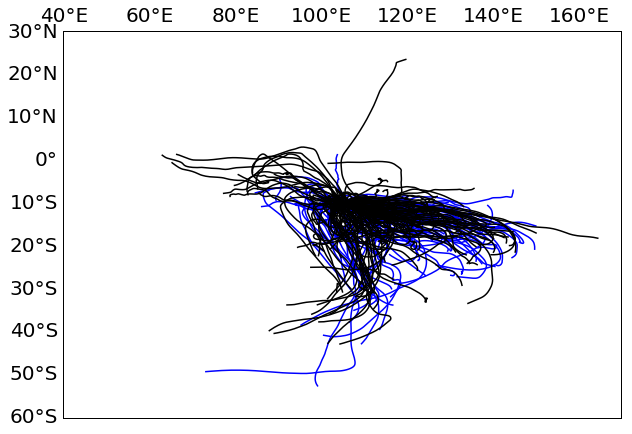

In [62]:
mapcorners =  [40, -60, 170, 30]
standard_pm = None

bmap_params = py.MapDesign(mapcorners, standard_pm)

#"""
#Once the ``MapDesign`` is initialized it can be used to draw a map:
#"""
bmap = bmap_params.make_basemap()

#"""
#Plotting ``Trajectory`` Paths
#-----------------------------
#For this example, we will color-code by initialization (t=0) altitude,
#(500, 1000, or 1500 m), which can be accessed via ``Trajectory.data.geometry``,
# a ``GeoSeries`` of Shapely ``Point`` objects.
#We can store the trajectory color in ``Trajectory.trajcolor`` for convenience.
#"""
color_dict = {rainy : 'blue',
              1000.0 : 'orange',
              1500.0 : 'blue'}

for traj in trajgroup:
    altitude0 = traj.data.geometry.apply(lambda p: p.z)[0]
    traj.trajcolor = color_dict[altitude0]

#"""
#For display purposes, let's plot only every fifth ``Trajectory``.  The lats,
#lons are obtained by unpacking the ``Trajectory.Path``
#(Shapely ``LineString``) xy coordinates.
#"""
for traj in rainy_trajgroup[::5]:
    bmap.plot(*traj.path.xy, c=traj.trajcolor, latlon=True, zorder=20)
    
for traj in dry_trajgroup[::5]:
    bmap.plot(*traj.path.xy, c=traj.trajcolor, latlon=True, zorder=20)

In [72]:
(trajgroup[5].filename)

'XIjan1500summer2015010604'

In [70]:
type(trajgroup[5].data)

geopandas.geodataframe.GeoDataFrame